In [63]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **What is noise?**
Noise in images refers to unwanted **random variations** in pixel values that distort the original content. It appears as **grainy, speckled, or blotchy artifacts** that reduce the **clarity and quality** of the image.

**Causes of Noise:**
*   Camera sensors in low light
*   High ISO settings
*   Transmission errors
*   Compression artifacts
*   Environmental interference



**Types of noise:**


*   Gaussian noise: Grainy, spread evenly.
*   Salt-and-Pepper Noise: Random black & white dots.
*   Speckle Noise: Multiplicative grainy pattern.
*   Poisson Noise: Varies with signal intensity.


This notebook consists of implementation of  two types of noise reduction techniques one using **median based filter** and other using **mean based filter** without using **prebuilt filter libraries**.

In [64]:
#Importing the libraries
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# **Mean Filter (Box Filter)**

The function `mean_filter()` applies mean filter to a RGB image using a specified kernal size.

The mean filter works by replacing each pixel with the **average value of its surrounding neighborhood**, defined by the kernel. This results in a **blurring effect** that helps **reduce general noise**, but it may also **blur edges**.

Unlike using pre-built functions from libraries like OpenCV, this implementation is done **completely from scratch**, iterating over each pixel manually using NumPy.



In [65]:
def mean_filter(img, ker=3, save_path=None):
    """
    Applies a hand-coded mean filter (blurring) to an image.

    Parameters:
    img (str or PIL.Image.Image): Path to the image file or a PIL image object.
    ker (int): Size of the square kernel (must be odd). Default is 3.
    save_path (str, optional): If provided, saves the filtered image to this path.

    Returns:
    tuple: (original_image, filtered_image) as PIL.Image.Image objects.
    """
    #Creating the matrix representation of the image
    if isinstance(img, str):
        img = Image.open(img)
    img_mat = np.array(img)

    #Kernal radius
    offset = ker//2

    #Padding the matrix(for RGB images)
    pad_mat = np.pad(img_mat, pad_width=((offset, offset),(offset, offset),(0, 0)),mode='constant')

    #Creating the target matrix(initialized with zero)
    filt_mat = np.zeros_like(img_mat)

    #filtering process
    for row in range(offset, pad_mat.shape[0]-offset):
        for col in range(offset, pad_mat.shape[1]-offset):
            for ch in range(0,pad_mat.shape[2]):
                kernal = pad_mat[row-offset:row+offset+1, col-offset:col+offset+1,ch]
                avg = np.mean(kernal)
                filt_mat[row-offset,col-offset,ch]=avg

    #Convert the filtered matrix back to image
    filt_img = Image.fromarray(filt_mat)

    #Saving the image(optinal)
    if save_path:
        filt_img.save(save_path)

    #returns original and filtered image
    return img, filt_img


The function `show_images()` displays both the **original** and the **filtered** image for comparison.

In [66]:
def show_images(original, filtered):
    plt.figure(figsize=(8, 10),facecolor='#f0f7bd')
    #displaying original image
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(original)
    plt.axis('off')
    #displaying filtered image
    plt.subplot(1,2,2)
    plt.title("Filtered")
    plt.imshow(filtered)
    plt.axis('off')
    plt.show()

The following image consists of lot of noise.

The noise is reduced by applying **Mean** and **Median** based filter and then the results are displayed to make a comparison between the both.

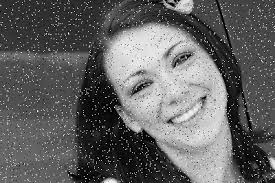

In [67]:
img_path = "/content/drive/MyDrive/Colab Notebooks/Noise Reduction/girl_noisy_image.jpeg"
Image.open(img_path)

Applying `mean_filter()` to the noisy image with 3 × 3 kernal.

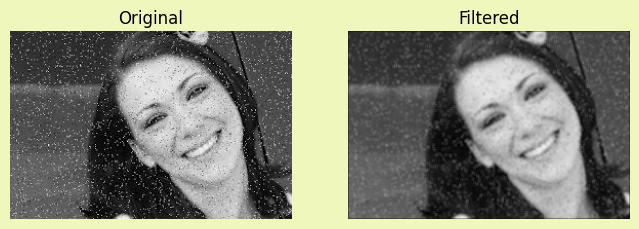

In [68]:
original, mean_filtered = mean_filter(img_path, ker=3)
show_images(original, mean_filtered)

The `mean_filter()` has reduced noise to certain extent but, it has also **blurred** the edges.

Fine **textures** and **pattern**s have disappeared due to smoothing.

Increasing the kernal size,  further **amplifies** the mentioned effect.



---


# **Median Filter**

The function `median_filter()` applies a **median filter** to an RGB image using a specified kernel size.

The median filter works by **replacing each pixel with the median value of its surrounding neighborhood**, defined by the kernel. This helps preserve edges while effectively removing impulse noise **(like salt-and-pepper noise)**, without introducing as much blurring as the mean filter.

In [69]:
def median_filter(img, ker=3, save_path=None):

    """
    Applies a median filter to an RGB image using a specified kernel size.

    Parameters:
        img (str or PIL.Image): The input image, either a file path (string) or a PIL Image object.
        ker (int): Size of the square kernel (must be an odd number, e.g., 3, 5, 7). Controls the neighborhood used for computing the median.
        save_path (str, optional): If provided, the filtered image is saved to this path.

    Returns:
        tuple: A tuple containing the original image (as a PIL Image) and the filtered image.
    """
    if isinstance(img, str):
        img = Image.open(img)

    #Creating the matrix representation of the image
    img_mat = np.array(img)

    #kernal radius
    offset = ker//2

    #Padding the matrix
    pad_mat = np.pad(img_mat, pad_width=((offset,offset),(offset,offset),(0,0)),mode='constant')

    #Creating the target matrix(initialized with zero)
    filt_mat = np.zeros_like(img_mat)

    #Filtering process
    for row in range(offset, pad_mat.shape[0]-offset):
        for col in range(offset, pad_mat.shape[1]-offset):
            for ch in range(0,pad_mat.shape[2]):
                kernal = pad_mat[row-offset:row+offset+1, col-offset:col+offset+1,ch]
                avg = np.median(kernal)
                filt_mat[row-offset,col-offset,ch]=avg

    #Convert the filtered matrix back to image
    filt_img = Image.fromarray(filt_mat)

    #Saving the image(optinal)
    if save_path:
        filt_img.save(save_path)
    return img, filt_img

Applying `median_filter()` to the noisy image with 3 × 3 kernal

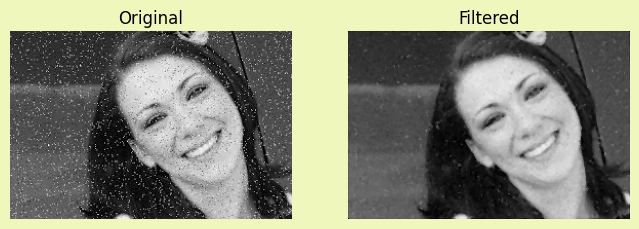

In [70]:
original, median_filtered = median_filter(img_path, ker=3)
show_images(original, median_filtered)

The **median filter** effectively removes impulse noise such as **salt-and-pepper** artifacts while preserving important image structures like **edges**. It achieves denoising by selecting the median pixel value from the local neighborhood, making it robust against **outliers** and preserving detail better than **averaging techniques**.

`show_all()` display both the filtered images for comparision.

In [71]:
def show_all(original, mean_filtered, median_filtered):
    plt.figure(figsize=(12, 10),facecolor='#f0f7bd')
    #displaying original image
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(original)
    plt.axis('off')
    #displaying mean-filtered image
    plt.subplot(1,3,2)
    plt.title("Filtered(Mean)")
    plt.imshow(mean_filtered)
    plt.axis('off')
    #displaying median-filtered image
    plt.subplot(1,3,3)
    plt.title("Filtered(Median)")
    plt.imshow(median_filtered)
    plt.axis('off')
    plt.show()

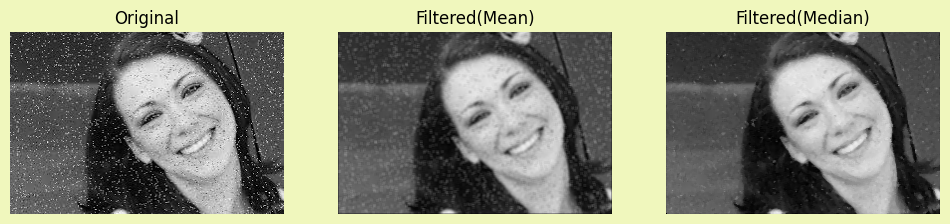

In [72]:
show_all(original, mean_filtered, median_filtered)

From the above images we could infer that both filters are capable when it comes to reducing the noise but **Median** based filter are better than **Mean** based filter when it comes to preserving **edges and textures**.



---



In [ ]:
!sudo apt-get install git
!git config --global user.name "Vikhyath V Shetty"
!git config --global user.email "vikhyath.v.shetty@gmail.com"
